# 국민건강보험공단 건강 검진 데이터 (기준년도 2020년)

가설을 세우고 분석을 통해 검정해보는 시간

example 가설 
1. 음주 여부에 따라 건강검진 수치 차이가 있을까?
2. ..? (본인이 가설을 세워봅시다)

## 0. 필요한 패키지 로드

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
pd.set_option('display.max_rows', None)
%config InlineBackend.figure_format = 'retina'
## chart style 지정, 스타일 유형은 아래 링크 참고
## https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('tableau-colorblind10')

## 1. 데이터 로드

In [42]:
nhis_url = "https://raw.githubusercontent.com/bokyungB/visualization_course/main/data/NHIS_healthcheckinfo_20211229.CSV"
# nhis = pd.read_csv(nhis_url,sep=",",encoding='cp949')
## 사용하지 않는 열은 제외해, 메모리 사용량 줄이기 
nhis = pd.read_csv(nhis_url,sep=",",encoding='cp949',dtype=np.float32,
                    usecols=lambda x: x not in ['데이터 공개일자' ,'기준년도'])

In [43]:
nhis.shape

(1000000, 29)

In [44]:
nhis.tail(5)

,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
999995,999996.0,41.0,2.0,13.0,145.0,55.0,81.000000,0.9,1.0,1.0,...,1.0,0.6,21.0,25.0,18.0,1.0,0.0,0.0,NaN,NaN
999996,999997.0,26.0,2.0,12.0,160.0,55.0,76.500000,1.5,1.5,1.0,...,1.0,0.8,21.0,14.0,19.0,1.0,1.0,0.0,NaN,NaN
999997,999998.0,48.0,1.0,9.0,175.0,70.0,85.000000,1.2,1.2,1.0,...,1.0,0.9,26.0,20.0,17.0,1.0,1.0,0.0,NaN,NaN
999998,999999.0,48.0,2.0,9.0,160.0,70.0,91.000000,0.6,0.5,1.0,...,1.0,1.0,25.0,29.0,13.0,1.0,0.0,0.0,NaN,NaN
999999,1000000.0,28.0,1.0,11.0,160.0,55.0,76.099998,2.0,2.0,1.0,...,1.0,0.9,17.0,13.0,24.0,2.0,0.0,0.0,NaN,NaN


In [45]:
nhis.sample()

,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
943034,943035.0,44.0,1.0,16.0,160.0,65.0,93.0,0.8,0.4,1.0,...,1.0,1.1,32.0,25.0,17.0,1.0,1.0,0.0,NaN,NaN


### +) 데이터 부가 설명 

* 건강검진정보란 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만40세와 만66세에 도달한 이들이 받게 되는 생애전환기건강진단 수검이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터입니다.

    <details>
    <summary> 데이터 항목명 자세한 설명</summary>

    * 각각의 빈 항목은 개개인별 실행하지 않은 부분 입니다.
    * 2020년도는 ＂결손치 유무, 치아마모증유무, 제3대구치(사랑니) 이상＂ 미시행으로 항목 삭제
    * 2020 년 청력 항목 답변 변경으로 인해 1: 정상, 2:질환의심, 3: 측정 불가로 바뀝
    * 흡연 상태에 전자 담배에 대한 내용은 포함되지 않았음.
  
    <img src="https://i.imgur.com/Twtlh6W.png">

    <img src="https://i.imgur.com/GJqg05v.png">

    </details>


공공데이터 개방서비스( http://nhiss.nhis.or.kr/op/it/index.do )에서도 다운로드 받을 수 있음.


## 2. 데이터셋 파악

In [46]:
nhis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   가입자 일련번호      1000000 non-null  float32
 1   시도코드          1000000 non-null  float32
 2   성별코드          1000000 non-null  float32
 3   연령대 코드(5세단위)  1000000 non-null  float32
 4   신장(5Cm단위)     1000000 non-null  float32
 5   체중(5Kg 단위)    1000000 non-null  float32
 6   허리둘레          999892 non-null   float32
 7   시력(좌)         999743 non-null   float32
 8   시력(우)         999748 non-null   float32
 9   청력(좌)         999778 non-null   float32
 10  청력(우)         999770 non-null   float32
 11  수축기 혈압        992468 non-null   float32
 12  이완기 혈압        992466 non-null   float32
 13  식전혈당(공복혈당)    992398 non-null   float32
 14  총 콜레스테롤       402306 non-null   float32
 15  트리글리세라이드      402322 non-null   float32
 16  HDL 콜레스테롤     402315 non-null   float32
 17  LDL 콜레스테롤     394471 non-nul

In [47]:
# TODO Q1 .컬럼명 확인하기

<details>
<summary> 컬럼명 확인하기</summary>
['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자']

</details>

In [48]:
# 결측치 확인
# isnull을 통해 결측치를 bool값으로 표시하고, sum 으로 컬럼당 결측치 확인
nhis.isnull().sum()

# isna 로도 확인가능 nhis.isna().sum()

가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)              257
시력(우)              252
청력(좌)              222
청력(우)              230
수축기 혈압            7532
이완기 혈압            7534
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
구강검진 수검여부            0
치아우식증유무         668617
치석              668618
dtype: int64

### + 참고) 한국어 깨지지 않게 하는 방법 
1. import matplotlib
2. 글꼴 다운 받기 (https://hangeul.naver.com/2017/nanum)
3. mpl.matplotlib_fname() 로 출력되는 폴더로 이동
4. 다운 받은 글꼴 fonts/ttf에 넣어주기  
5. print(mpl.rcParams['font.family']) 로 기존 글꼴 확인하기
6. mpl.rcParams['font.family'] = 'NanumGothic' 로 설정하기 
7. 그래프로 확인해보기

In [49]:
## step1. import matplotlib
import matplotlib as mpl

## step3. 출력되는 폴더 확인 
print(mpl.matplotlib_fname())

## step5. 기존 글꼴 확인하기
print(mpl.rcParams['font.family'])

## step6. 한글 폰트로 설정
mpl.rcParams['font.family'] = 'NanumGothic'
print(mpl.rcParams['font.family'])

c:\Users\bigda\anaconda3\envs\aisample\lib\site-packages\matplotlib\mpl-data\matplotlibrc
['NanumGothic']
['NanumGothic']


<AxesSubplot:>

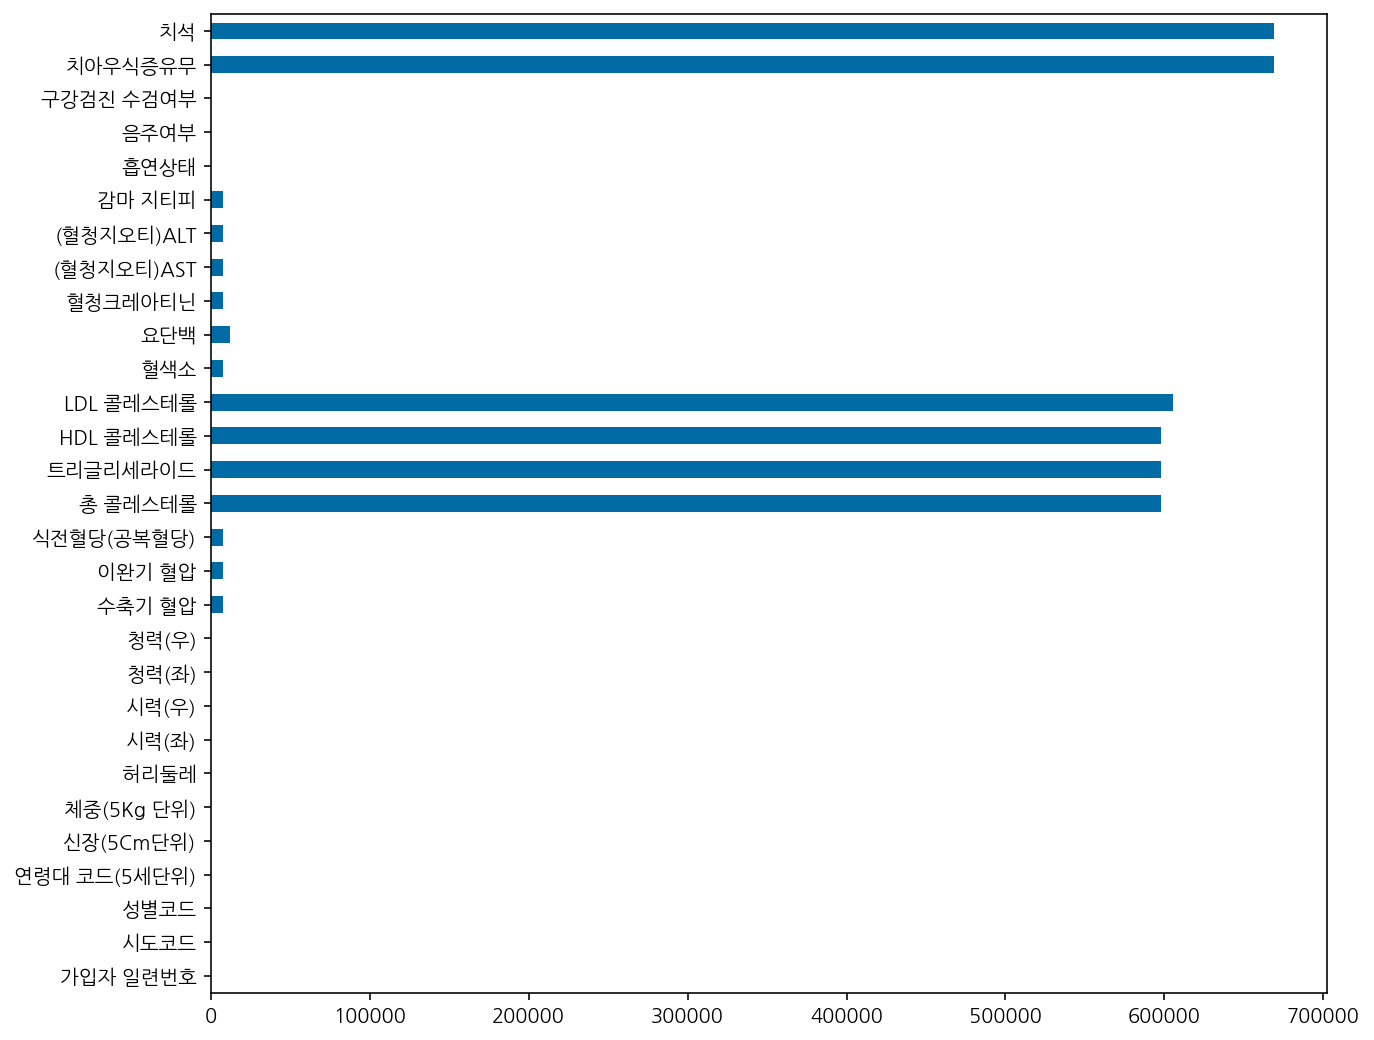

In [50]:
## step7. pandas에 내장된 plot을 통해 시각화 해보기

nhis.isnull().sum().plot.barh(figsize=(10, 9))

## 3. 값 집계하기 
* value_counts
* groupby
* pivot_table

### value_counts

In [51]:
## value_counts
print(nhis["성별코드"].value_counts(),'\n')
print(nhis["흡연상태"].value_counts())

1.0    510689
2.0    489311
Name: 성별코드, dtype: int64 

1.0    626138
2.0    189808
3.0    183711
Name: 흡연상태, dtype: int64


### groupby

In [52]:
## groupby 
## 성별코드(1:남, 2:여) 와 음주여부로 그룹화를 하고 갯수를 세어봅니다.
print(nhis.groupby(["성별코드", "음주여부"])["가입자 일련번호"].count())

## TODO Q2. 성별코드와 음주여부로 그룹화를 하고 감마지티피의 "평균" 을 구해봅시다


## 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약 수치를 구합니다
nhis.groupby(["성별코드", "음주여부"])["감마 지티피"].describe()

성별코드  음주여부
1.0   0.0     131844
      1.0     378767
2.0   0.0     283275
      1.0     205918
Name: 가입자 일련번호, dtype: int64


count       mean        std  min   25%   50%   75%     max
성별코드 음주여부                                                               
1.0  0.0   130103.0  34.212193  38.533470  1.0  18.0  25.0  37.0  1731.0
     1.0   377769.0  55.059593  69.135223  1.0  24.0  36.0  60.0  2630.0
2.0  0.0   279033.0  24.177603  26.897675  1.0  14.0  18.0  26.0   999.0
     1.0   205296.0  26.728777  36.415154  1.0  14.0  18.0  27.0   999.0

In [53]:
## agg을 사용하면 여러 수치를 함께 구할 수 있습니다.

nhis.groupby(["성별코드", "음주여부"])["감마 지티피"].agg(
    ["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1.0  0.0   130103  34.212196    25.0
     1.0   377769  55.059597    36.0
2.0  0.0   279033  24.177603    18.0
     1.0   205296  26.728777    18.0

### pivot_table

In [54]:
## 음주여부에 따른 그룹화된 수를 피봇테이블로 구합니다.
nhis.pivot_table(index="음주여부", values="가입자 일련번호", aggfunc="count")

,가입자 일련번호
음주여부,
0.0,415119
1.0,584685


In [55]:
## TODO Q3. 음주 여부에 따른 감마지피티의 평균을 구해봅시다.


In [56]:
## groupby와 유사한 인자로 aggfunc에 여러 값을 한번에 지정해 pivot table 출력이 가능합니다.

pd.pivot_table(nhis, index="음주여부", values="감마 지티피", 
               aggfunc=["mean", "median"])

,mean,median
,감마 지티피,감마 지티피
음주여부,,
0.0,27.368547,20.0
1.0,45.084373,28.0


In [57]:
## aggfunc에 describe를 사용해 통계 요약값을 한번에 볼 수도 있습니다. 
pd.pivot_table(nhis, index="음주여부", values="감마 지티피", 
               aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,15.0,20.0,30.0,409136.0,1731.0,27.368549,1.0,31.423283
1.0,18.0,28.0,48.0,583065.0,2630.0,45.084381,1.0,61.210827


In [58]:
## TODO Q4. 성별코드, 음주여부에 따른 감마지티피 값의 평균을 구해봅시다


## 4. 시각화

### 4.1 판다스 내장 기능 활용

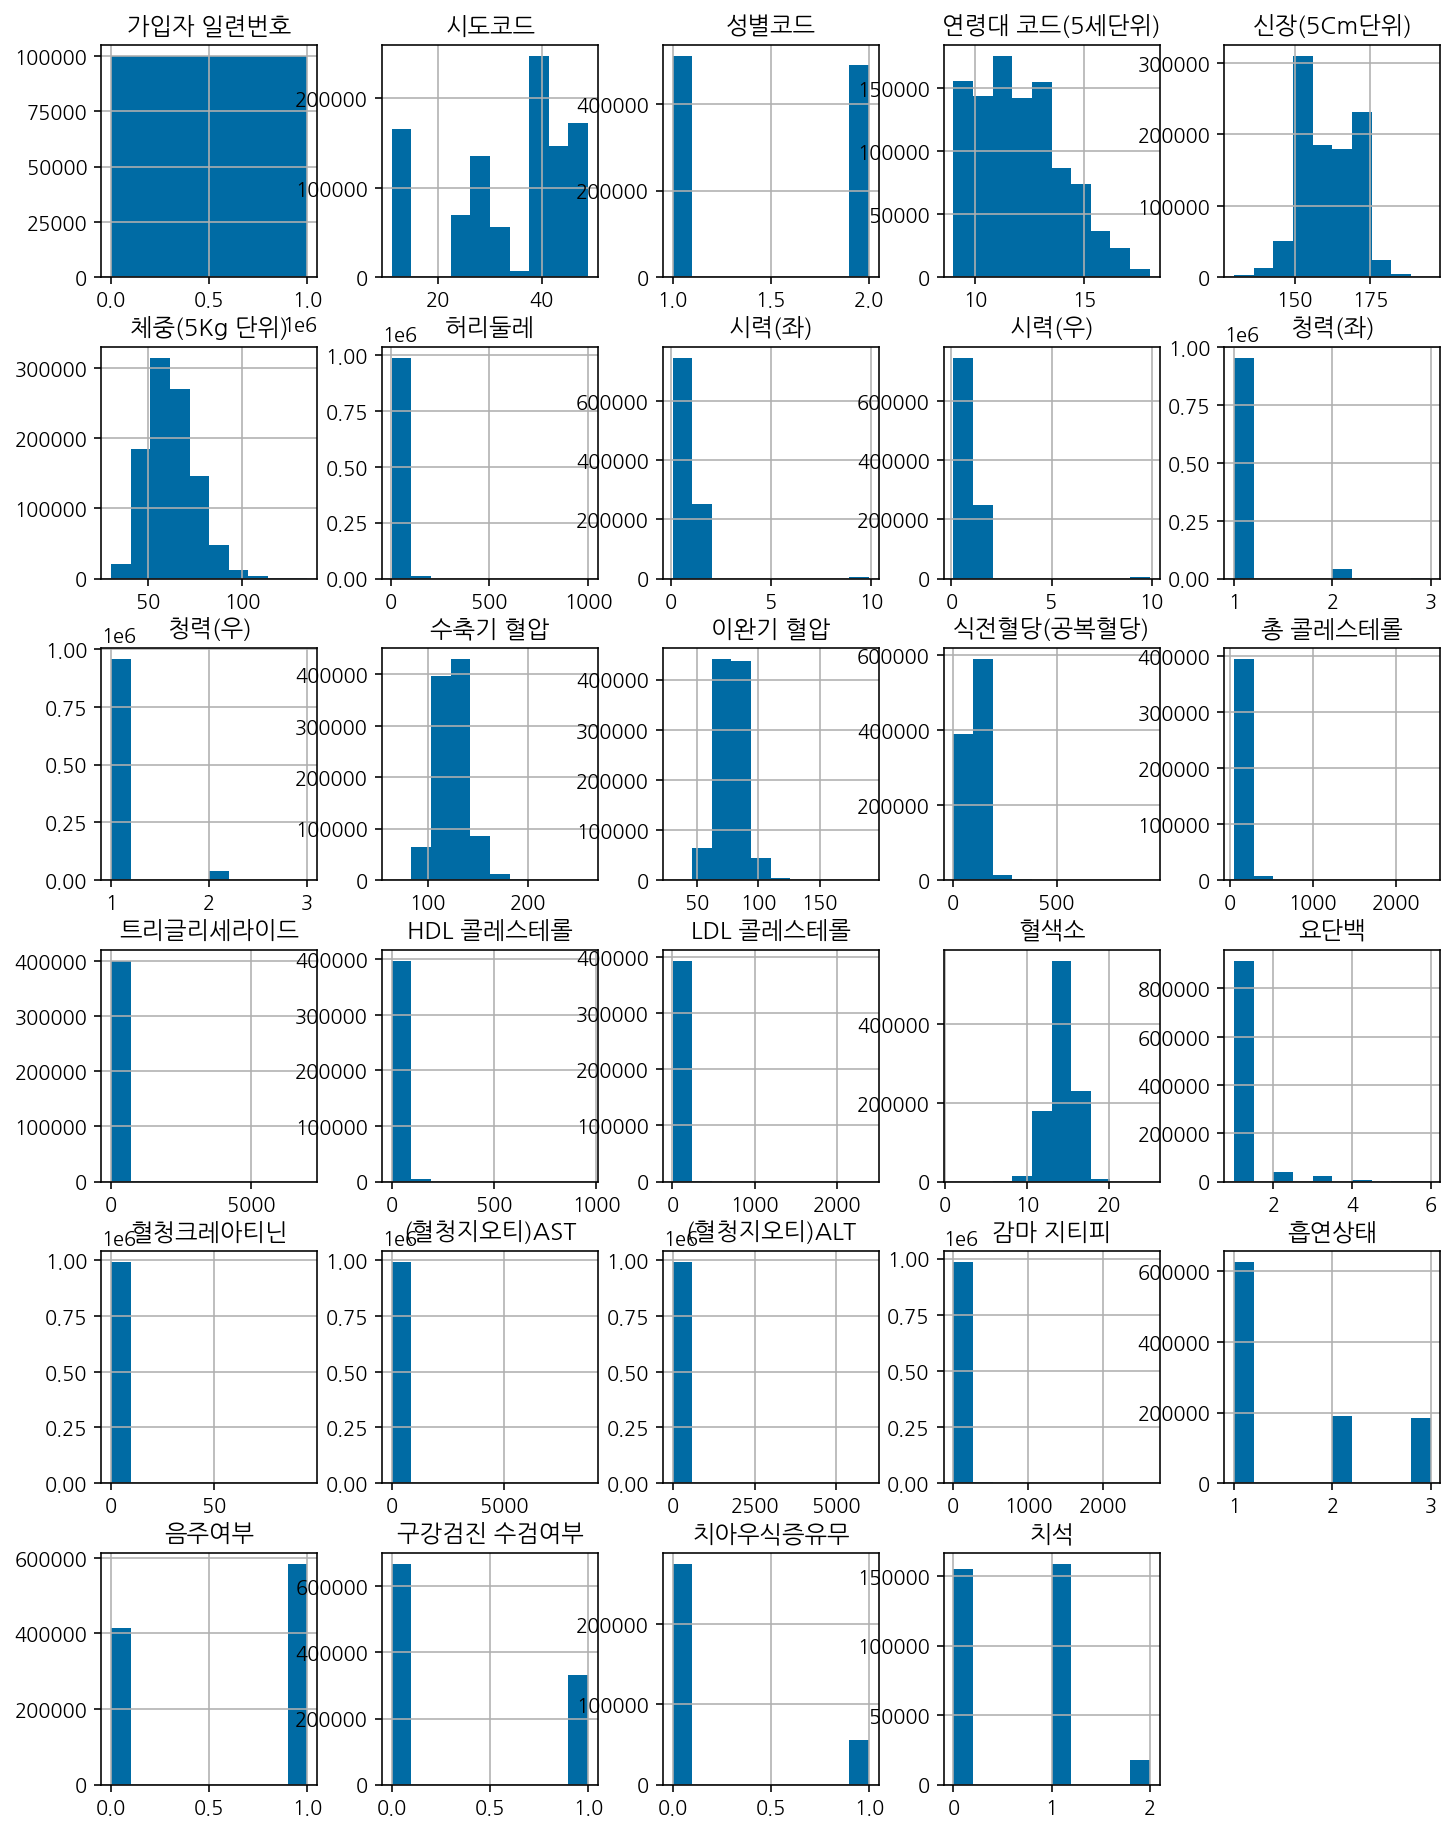

In [59]:
## 히스토그램 

## 전체 데이터에 대한 히스토그램 출력
nhis.hist(figsize=(12, 16))
plt.show()

- 슬라이싱을 사용해 히스토그램 그리기
  
    :  데이터 프레임을 슬라이싱해 해당 데이터만 시각화 할 수 있습니다. 

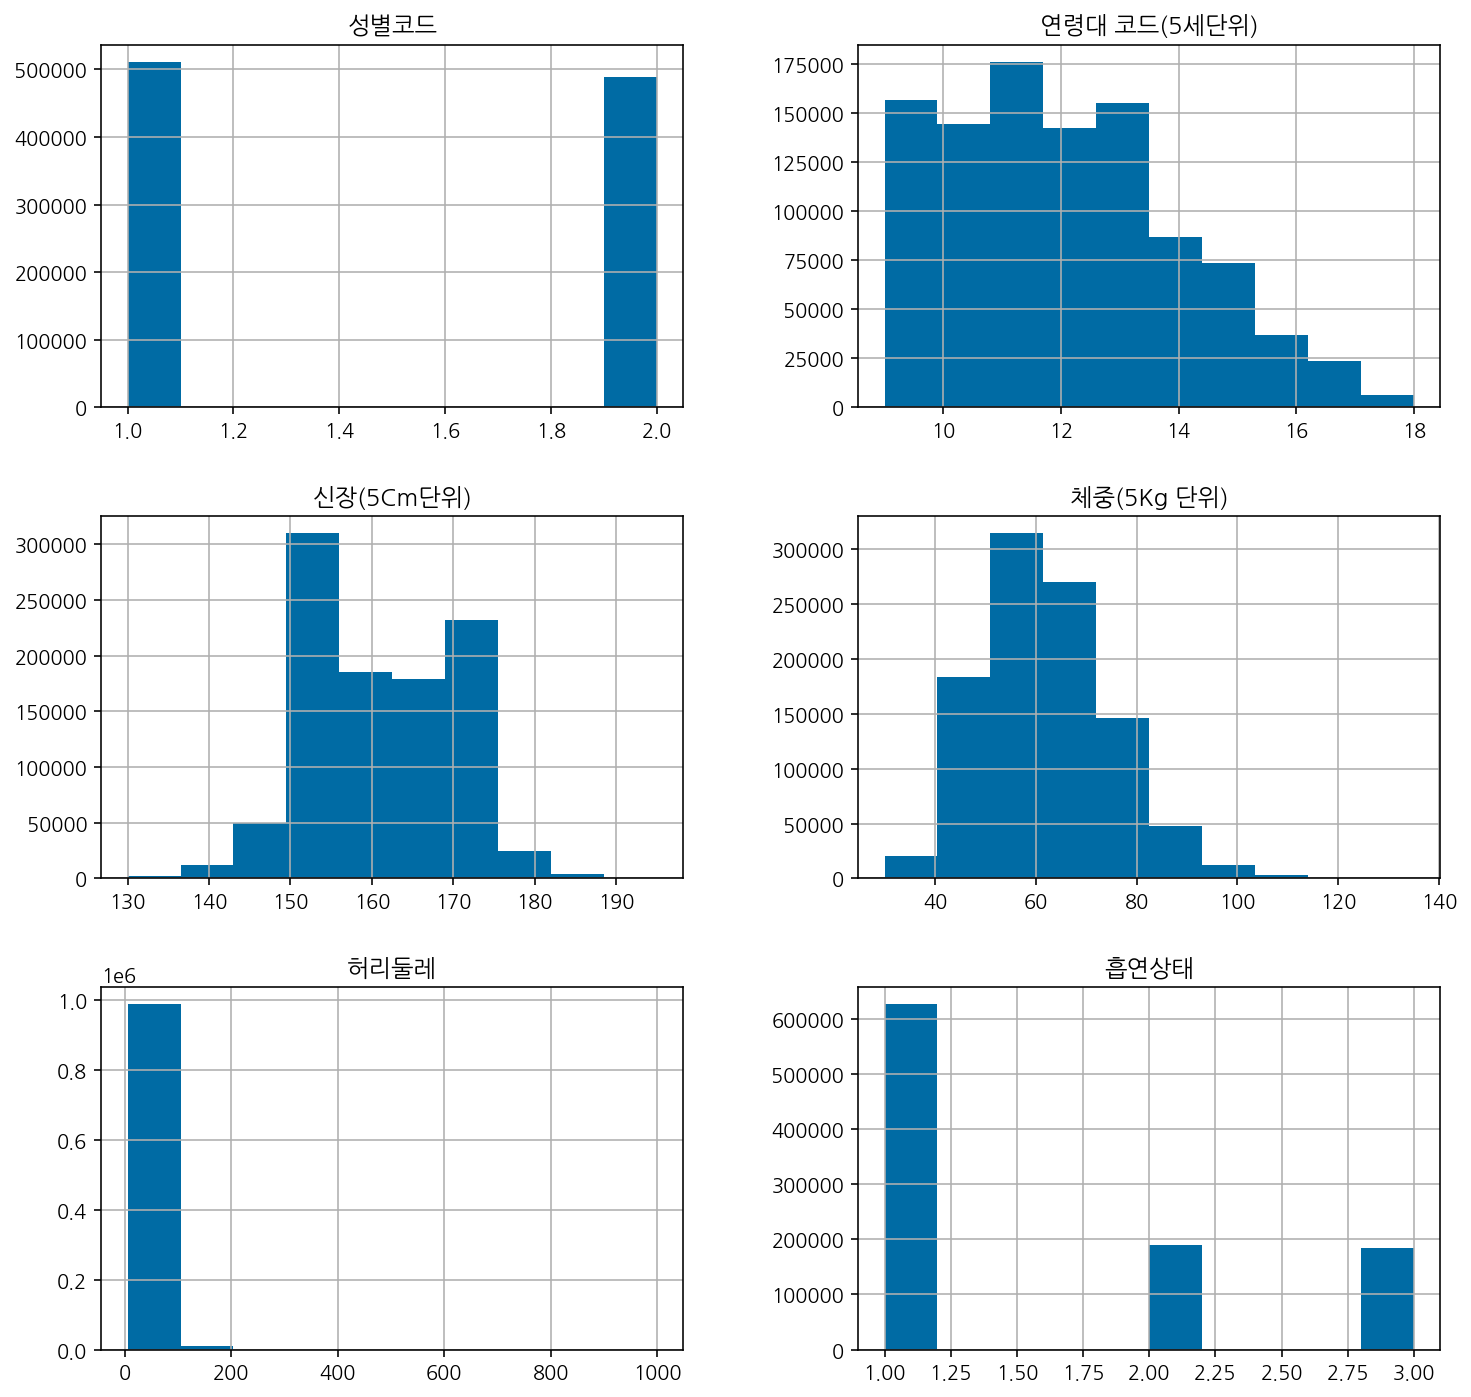

In [60]:
h = nhis.loc[:, ['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '흡연상태']].hist(figsize=(12, 12))

In [61]:
## TODO Q5. iloc로 수축기 혈압 ~(혈청지오티)ALT 에 해당하는 히스토그램을 시각화 해봅시다. 

### 4-2. 범주형 데이터 시각화

#### 음주여부 (막대그래프)

##### matplotlib version

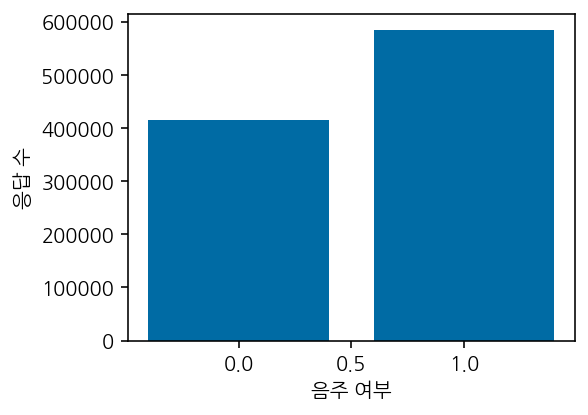

In [62]:
plt.figure(figsize=(4,3))
target= nhis['음주여부'].value_counts()
plt.bar(target.index, target)
plt.ylabel('응답 수')
plt.xlabel('음주 여부')
plt.show()

In [63]:
t = nhis.groupby(["성별코드", "음주여부"])["가입자 일련번호"].count()
male , female = t.loc[1,] , t.loc[2,]
print(male, female)

음주여부
0.0    131844
1.0    378767
Name: 가입자 일련번호, dtype: int64 음주여부
0.0    283275
1.0    205918
Name: 가입자 일련번호, dtype: int64


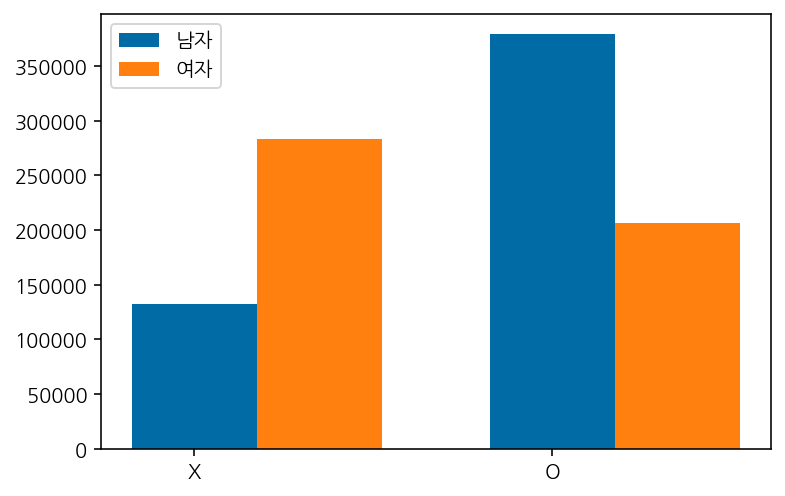

In [64]:
x_labels=['X','O']
pos = np.arange(len(x_labels))
Gender = ['남자','여자']
bar_width = 0.35

plt.bar(pos, male,bar_width)
plt.bar(pos+bar_width, female,bar_width)
plt.xticks(pos, x_labels)
plt.legend(Gender,loc=2)
plt.show()

In [65]:
# TODO Q6. x축을 연령대코드로 범례를 음주여부로 하는 그래프를 작성해봅시다.

##### seaborn version

In [66]:
## seaborn 은 matplotlib를 쉽게 사용할 수 있도록 도와줍니다. 간단하게 고급 통계 연산 가능합니다.
try:
    import seaborn as sns
except:
    ! pip install seaborn
    import seaborn as sns
finally:
    print(sns.__version__)

0.11.2


<AxesSubplot:xlabel='음주여부', ylabel='count'>

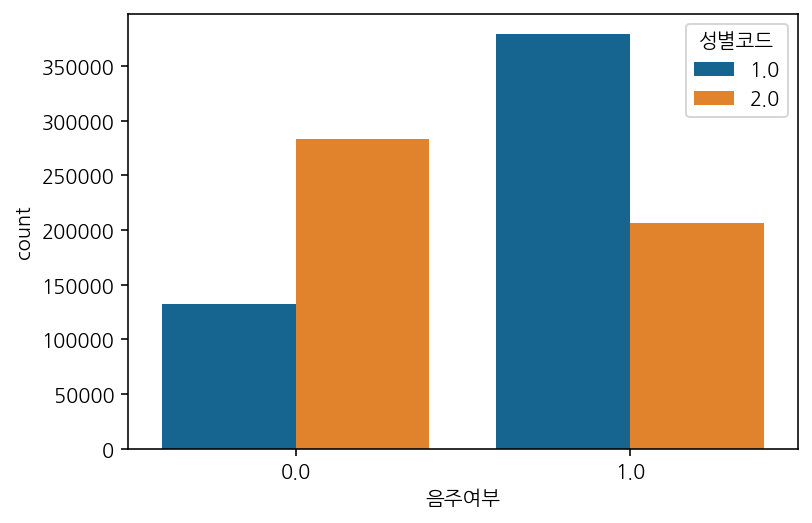

In [67]:
sns.countplot(data=nhis, x="음주여부", hue="성별코드")

In [68]:
# TODO Q7. x축을 연령대코드로 범례를 음주여부로 하는 그래프를 작성해봅시다.

#### 음주여부 (라인 그래프) 

##### matplotlib version

In [69]:
hemoglobin_by_age = nhis.groupby(["연령대 코드(5세단위)", "음주여부"])["혈색소"].mean()
hemoglobin_by_age

연령대 코드(5세단위)  음주여부
9.0           0.0     13.886781
              1.0     14.592899
10.0          0.0     13.751120
              1.0     14.517020
11.0          0.0     13.883419
              1.0     14.580787
12.0          0.0     13.926153
              1.0     14.614677
13.0          0.0     13.836416
              1.0     14.569112
14.0          0.0     13.736248
              1.0     14.493237
15.0          0.0     13.582815
              1.0     14.370973
16.0          0.0     13.311981
              1.0     14.163575
17.0          0.0     13.075500
              1.0     13.831458
18.0          0.0     12.502710
              1.0     13.390067
Name: 혈색소, dtype: float32

In [70]:
unlevel_hba = hemoglobin_by_age.reset_index(level=[0,1])
unlevel_hba.head(2)

,연령대 코드(5세단위),음주여부,혈색소
0,9.0,0.0,13.886781
1,9.0,1.0,14.592899


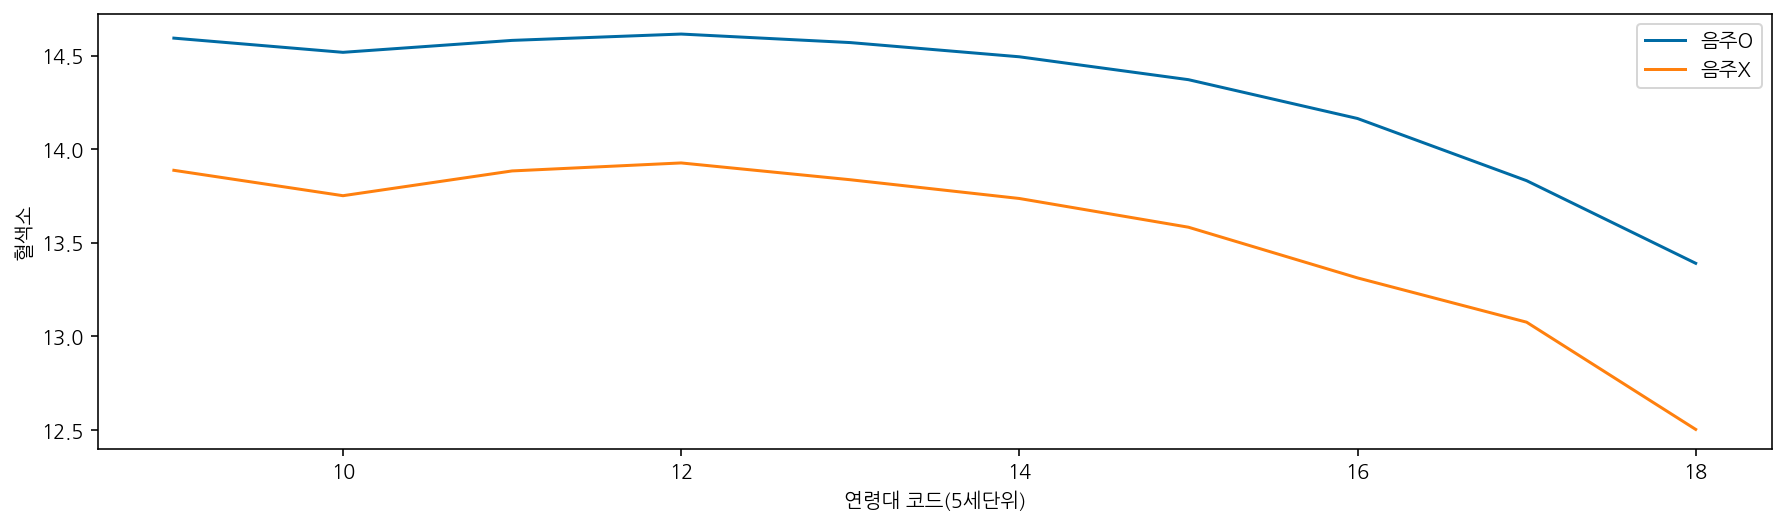

In [71]:

yes,no = unlevel_hba['음주여부'] == 1, unlevel_hba['음주여부'] == 0
yes_df,no_df = unlevel_hba[yes],unlevel_hba[no]
x, y =  '연령대 코드(5세단위)','혈색소'

plt.figure(figsize=(15, 4))
plt.plot(yes_df[x],yes_df[y],label='음주O')
plt.plot(no_df[x],no_df[y],label='음주X')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

##### seaborn version

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

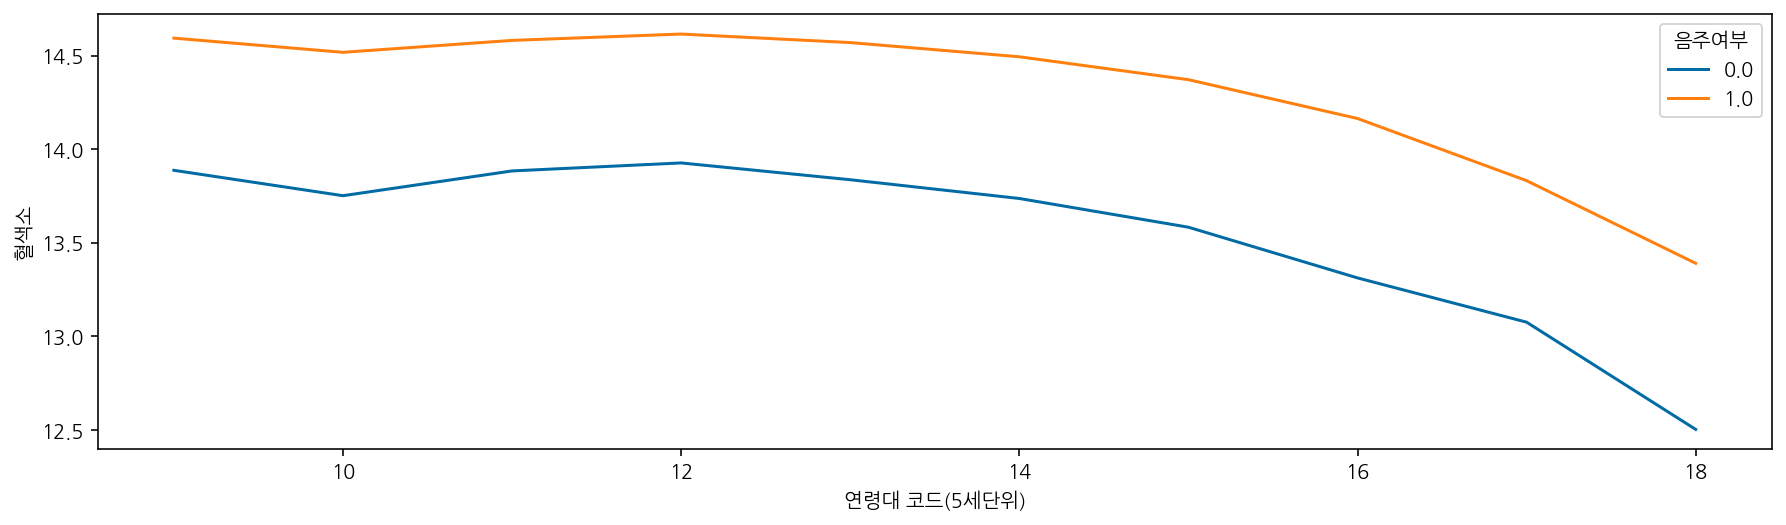

In [72]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=unlevel_hba, x="연령대 코드(5세단위)", y="혈색소", hue="음주여부", ci=None)

### 4-3. 수치형 데이터 시각화

#### scatter (산점도)
- 수치형 데이터 사이의 상관 관계를 볼 때 주로 사용합니다.
- 점의 크기를 데이터의 수치에 따라 다르게 볼 수  있습니다.

In [114]:
subset_cols = ['(혈청지오티)AST','(혈청지오티)ALT', '음주여부', '체중(5Kg 단위)','수축기 혈압','이완기 혈압']
df_sample = nhis.sample(1000,random_state=1).dropna(subset=subset_cols, how='any')

In [73]:
#  TODO Q8. '(혈청지오티)AST','(혈청지오티)ALT', '음주여부', '체중(5Kg 단위)','수축기 혈압','이완기 혈압' 만 포함하도록 데이터 슬라이싱 해봅시다.

##### matplotlib version

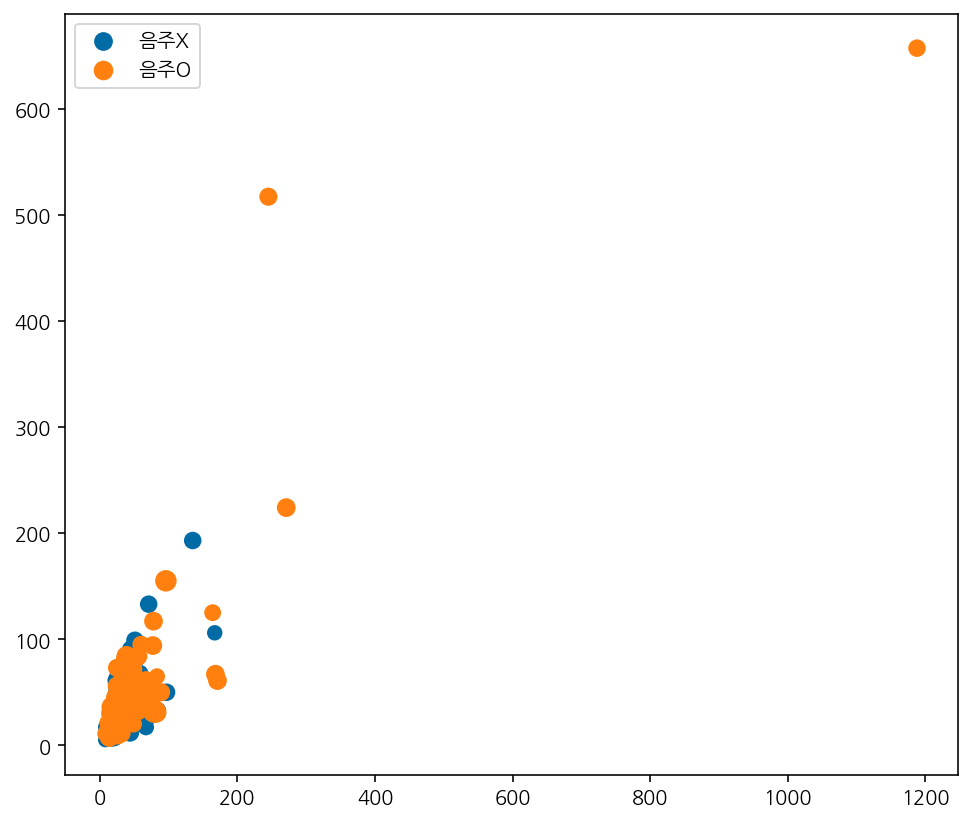

In [116]:
yes,no = df_sample['음주여부'] == 1, df_sample['음주여부'] == 0
yes_df,no_df = df_sample[yes],df_sample[no]
x, y ,m  =  "(혈청지오티)AST","(혈청지오티)ALT","체중(5Kg 단위)"

plt.figure(figsize=(8, 7))
plt.scatter(no_df[x],no_df[y],s = no_df[m],label='음주X')
plt.scatter(yes_df[x],yes_df[y],s = yes_df[m],label='음주O')

plt.legend()
plt.show()

In [86]:
# TODO Q9. 8번 퀴즈에서 만든 데이터셋으로 데이터 교체해 위의 그래프 다시 그려봅시다

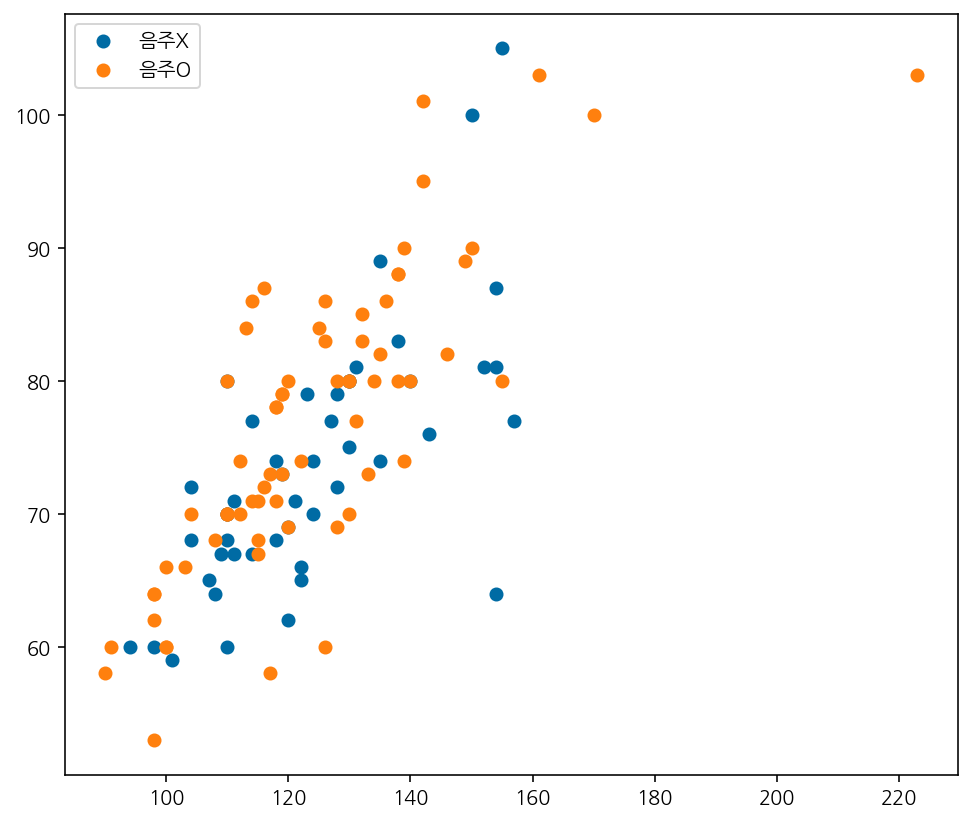

In [104]:
## 음주여부에 따른  수축기, 이완기 혈압 상관관계 파악

x2, y2  =  "수축기 혈압","이완기 혈압"

plt.figure(figsize=(8, 7))
plt.scatter(no_df[x2],no_df[y2],label='음주X')
plt.scatter(yes_df[x2],yes_df[y2],label='음주O')

plt.legend()
plt.show()

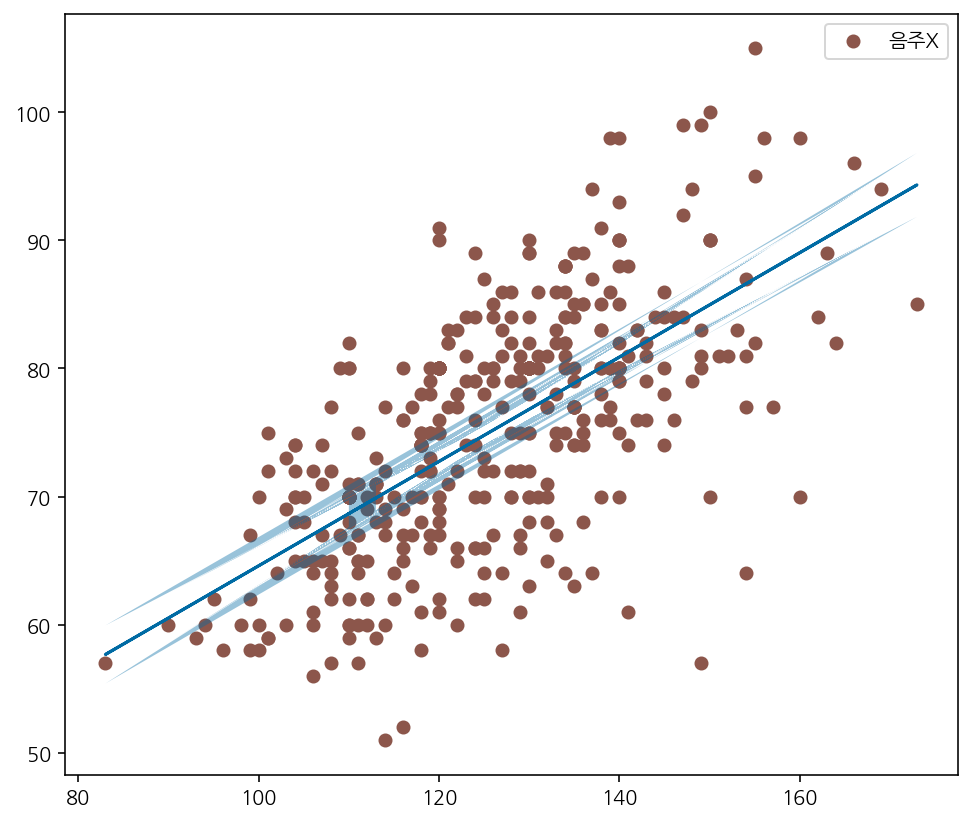

In [130]:
## 음주여부에 따른  수축기, 이완기 혈압 상관관계 파악
## linear regression line으로 수축기,이완기 혈압 기울기 파악

x2, y2  =  "수축기 혈압","이완기 혈압"

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(no_df[x2], no_df[y2], deg=1)
y_est = a * no_df[x2] + b
y_err = no_df[x2].std() * np.sqrt(1/len(no_df[x2]) +
                          (no_df[x2] - no_df[x2].mean())**2 / np.sum((no_df[x2] - no_df[x2].mean())**2))

plt.figure(figsize=(8, 7))

# linear regression curve 
plt.plot(no_df[x2],y_est)
# scatter plot
plt.scatter(no_df[x2],no_df[y2],label='음주X',color='tab:brown')
# confidence band 신뢰구간 
plt.fill_between(no_df[x2],y_est-y_err, y_est + y_err,alpha=0.4)


plt.legend()
plt.show()

In [ ]:
# TODO Q10. 위 그래프를 음주 한 경우에 적용해봅시다

# TODO Q11. 음주여부에 따른 수축기,이완기 혈압 비교 그래프를
#           하나의 그래프 안에 색상을 다르게 해 표현해봅시다.

##### seaborn version

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

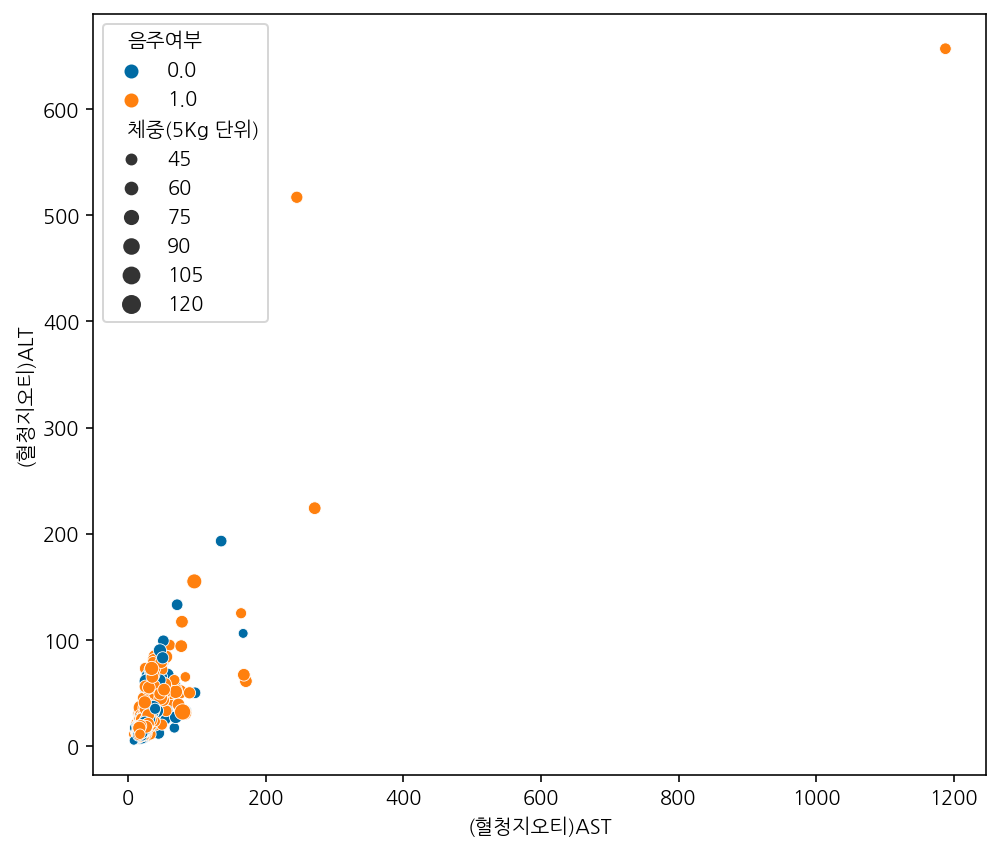

In [95]:
## scatterplot 으로 "(혈청지오티)AST", "(혈청지오티)ALT" 을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.
## TODO Q10. 8번 퀴즈에서 만든 데이터 셋으로 데이터를 교체해 봅시다.
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", 
                size="체중(5Kg 단위)")

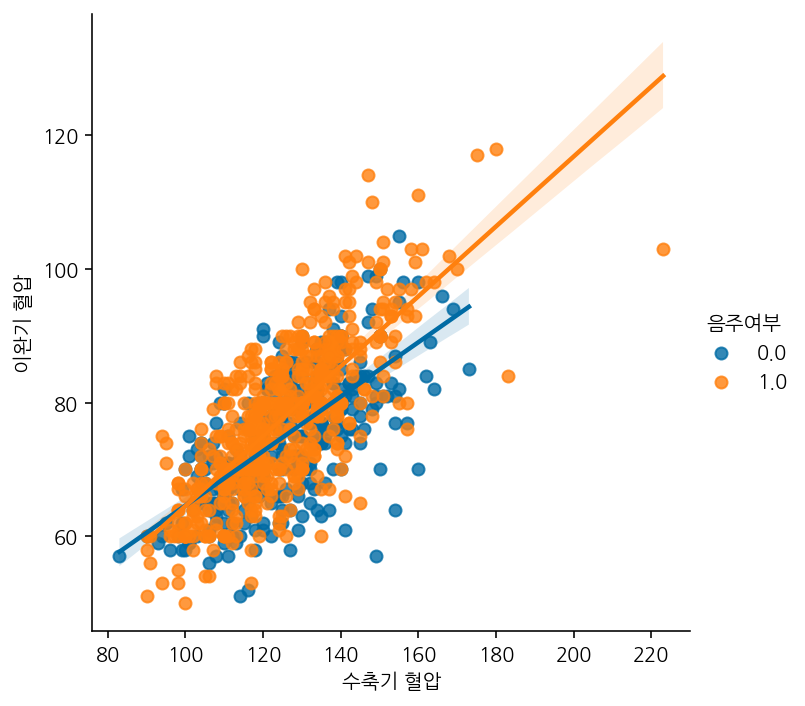

In [96]:
# lmplot 으로 수축기, 이완기혈압을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.

sns.lmplot(data=df_sample, x="수축기 혈압", y="이완기 혈압", hue="음주여부")

0.13.2


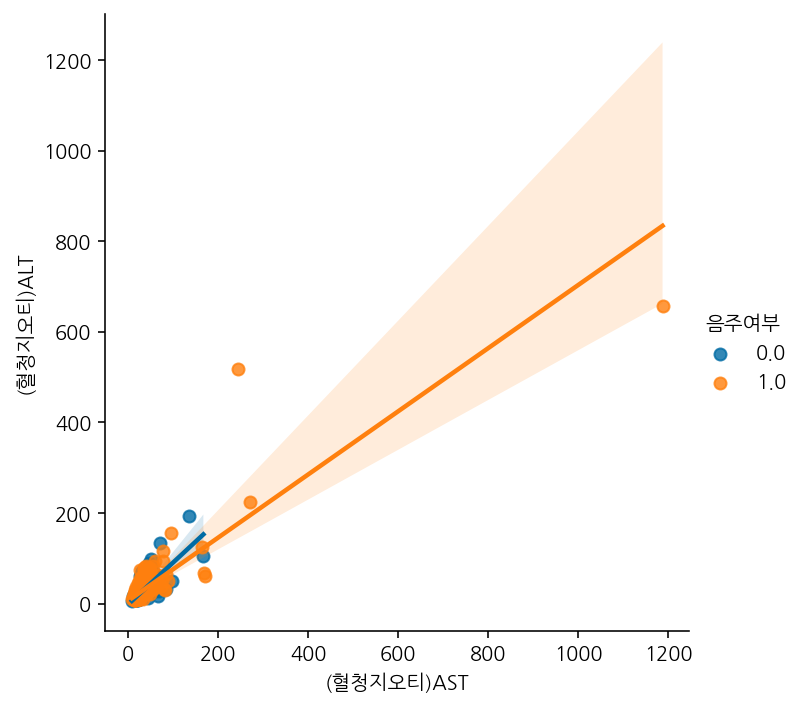

In [78]:
# lmplot으로 "(혈청지오티)AST", "(혈청지오티)ALT" 을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.
try:
    import statsmodels
except:
    !pip install --upgrade --no-deps statsmodels
finally:
    print(statsmodels.__version__)

sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", robust=True)

#### 히스토그램 , 확률 밀도 함수

## 5. 이상치 다루기

TODO 이상치가 제거된 상태의 산점도를 다시 한번 그려보기

## 6. 상관 분석

r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,

r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,

r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,

r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,

r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,

r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,

r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [79]:
## 상관계수에 사용할 열을 선택합니다.
corr_cols = ['연령대 코드(5세단위)', '체중(5Kg 단위)', '신장(5Cm단위)', '허리둘레', 
           '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', 
           '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', 
           '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '요단백', 
           '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부']

In [80]:
df_small = df_sample[corr_cols]
df_corr = df_small.corr()
df_corr.sample()

,연령대 코드(5세단위),체중(5Kg 단위),신장(5Cm단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,...,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
총 콜레스테롤,-0.231089,0.009567,0.053598,-0.027682,0.151671,0.034606,-0.062906,-0.017071,0.020739,0.08553,...,0.220912,0.934528,0.166658,-0.072645,-0.085469,0.026675,0.069357,0.124101,-0.017194,0.093756


In [85]:
## 키에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.

tall_ = df_corr.loc[df_corr["신장(5Cm단위)"] > 0.1, "신장(5Cm단위)"]

## 음주여부에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.

drunk_ = df_corr.loc[df_corr["음주여부"] > 0.25,"음주여부"]


hemo_ = df_corr["혈색소"].sort_values(ascending=False).head(7)
## TODO  혈색소에 대한 상관계수가 특정 수치 이상인 데이터를 봅시다.

rgpt_ = df_corr["감마 지티피"].sort_values(ascending=False).head(7)
## TODO  감마지티피에 대한 상관계수가 특정 수치 이상인 데이터를 봅시다.


tall : 
체중(5Kg 단위)    0.658184
신장(5Cm단위)     1.000000
허리둘레          0.343317
시력(좌)         0.152171
시력(우)         0.128649
이완기 혈압        0.187853
트리글리세라이드      0.176851
혈색소           0.529142
혈청크레아티닌       0.332333
(혈청지오티)ALT    0.105957
감마 지티피        0.188727
흡연상태          0.472717
음주여부          0.382014
Name: 신장(5Cm단위), dtype: float64 ,
drunk_ : 
신장(5Cm단위)    0.382014
흡연상태         0.289827
음주여부         1.000000
Name: 음주여부, dtype: float64 ,
hemo_ : 
혈색소           1.000000
신장(5Cm단위)     0.529142
체중(5Kg 단위)    0.442815
흡연상태          0.437007
허리둘레          0.309017
혈청크레아티닌       0.302206
이완기 혈압        0.300474
Name: 혈색소, dtype: float64 ,
rgpt_ : 
감마 지티피        1.000000
(혈청지오티)ALT    0.389966
(혈청지오티)AST    0.321716
트리글리세라이드      0.265705
혈색소           0.231606
흡연상태          0.216500
식전혈당(공복혈당)    0.205471
Name: 감마 지티피, dtype: float64 


c:\Users\bigda\anaconda3\envs\aisample\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Users\bigda\anaconda3\envs\aisample\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


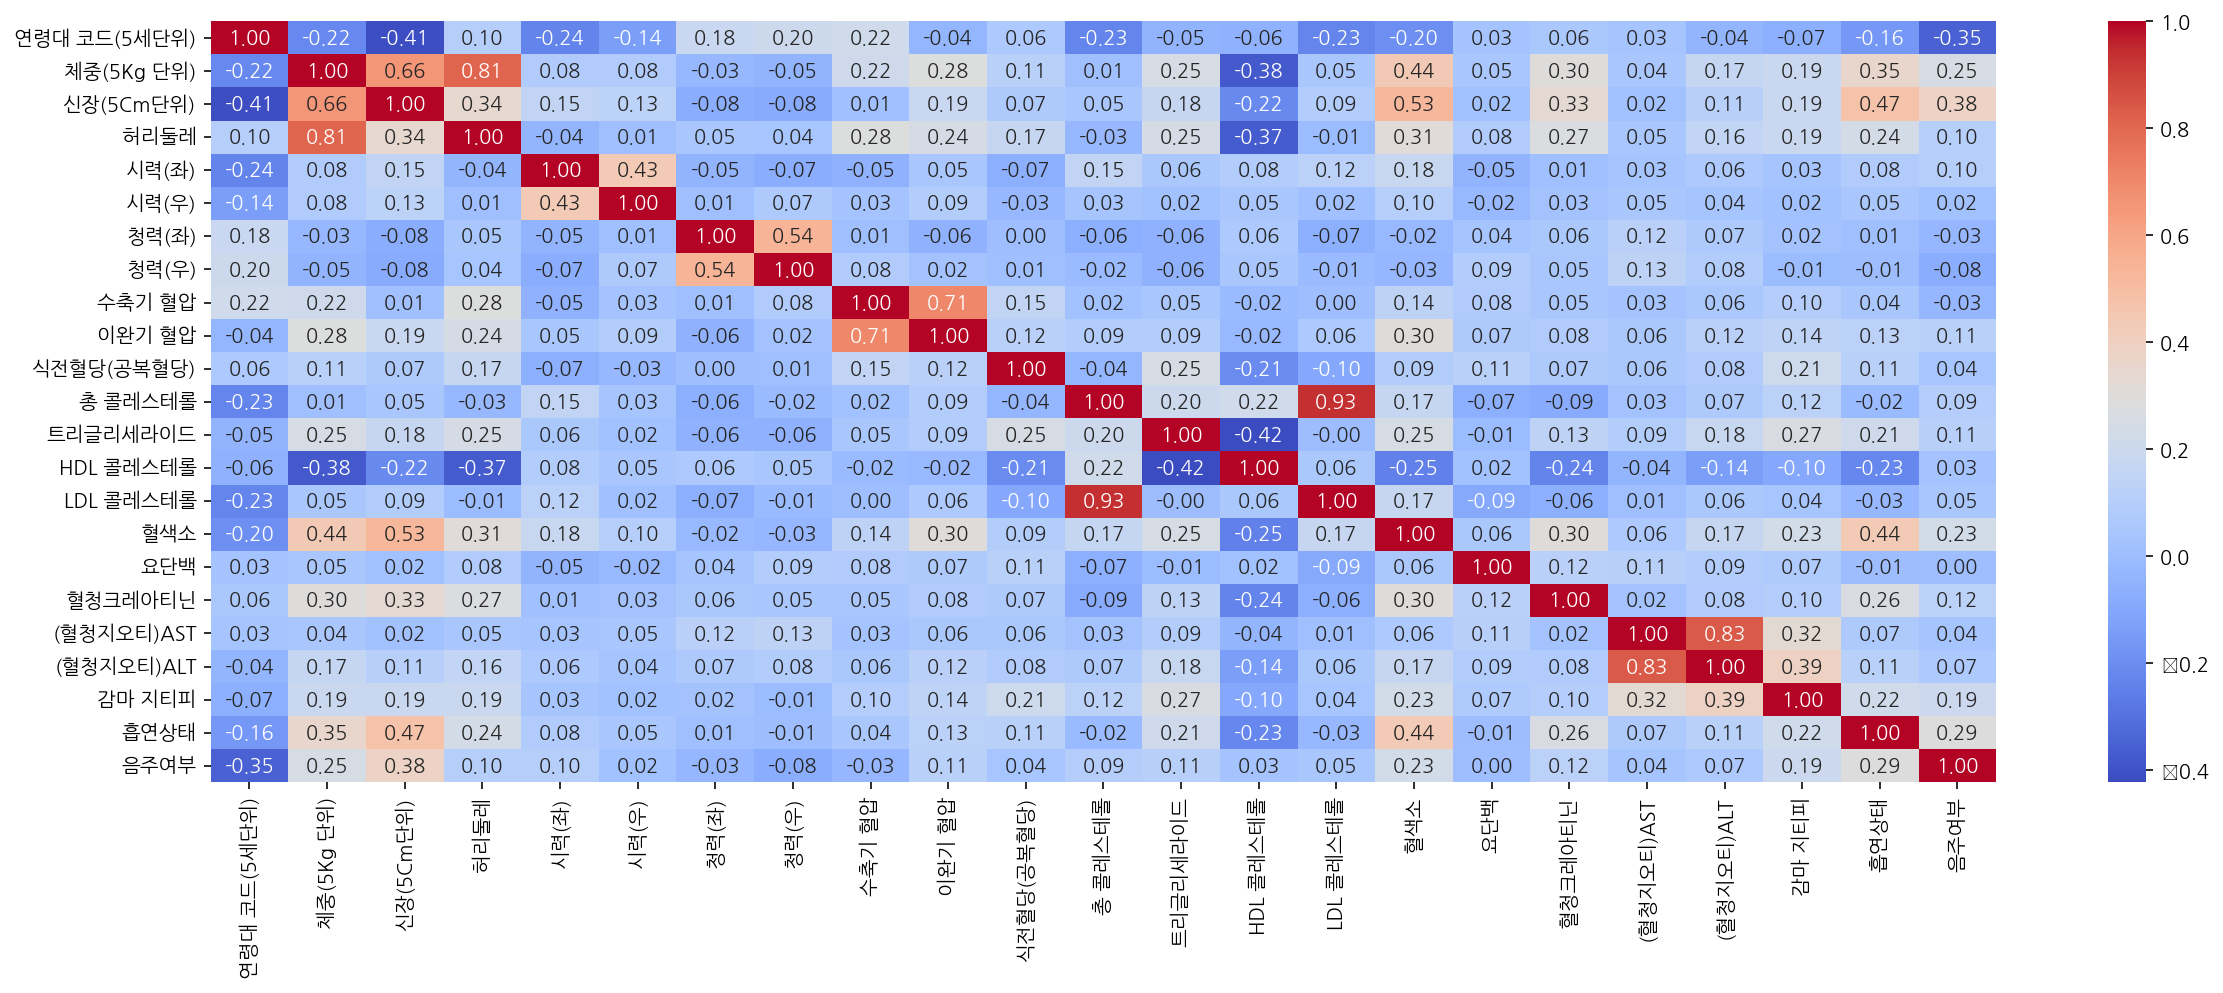

In [82]:
# 위에서 구한 상관계수를 heatmap을 통해 표현해 봅니다.
plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm")